# 비디오 데이터 생성 과정 예시

6시간 길이의 비디오를 구성할 때, 20개의 이미지로만 구성되도록 통일시킵니다.

따라서 6시간 내에 20개 초과 이미지로 구성되는 비디오의 경우, 이 중 무작위하게 20개를 골라 하나의 비디오로 구성합니다.

예시를 통해, 24개의 이미지로 구성된 비디오가 무작위 선택 후 20개의 이미지로 구성된 비디오로 통일됨을 보입니다.

In [16]:
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [17]:
rawdatapath = "raw_images/"
video_length = 6
sample_size = 20

np.random.seed(2021)

In [20]:
videos = []

if os.path.isdir(rawdatapath):
    rawimage_list = [d for d in os.listdir(rawdatapath) if os.path.isdir(rawdatapath + d) is True and "image" in d]
    for i, d_i in enumerate(rawimage_list):
        datetime_i = d_i.split("_")[0]
        year, month, day, hour, minute = int(datetime_i[0:4]), int(datetime_i[4:6]), int(datetime_i[6:8]), int(datetime_i[8:10]), int(datetime_i[10:12])
        t_i = datetime(year, month, day, hour, minute)
        video = [datetime_i]
        for j in range(i+1, len(rawimage_list)):
            d_j = rawimage_list[j]
            datetime_j = d_j.split("_")[0]
            year, month, day, hour, minute = int(datetime_j[0:4]), int(datetime_j[4:6]), int(datetime_j[6:8]), int(datetime_j[8:10]), int(datetime_j[10:12])
            t_j = datetime(year, month, day, hour, minute)
            length = (t_j - t_i).total_seconds() / 60 / 60
            if length >= video_length:
                break
            video.append(datetime_j)
        videos.append(video)

Randomly select 20 among 24


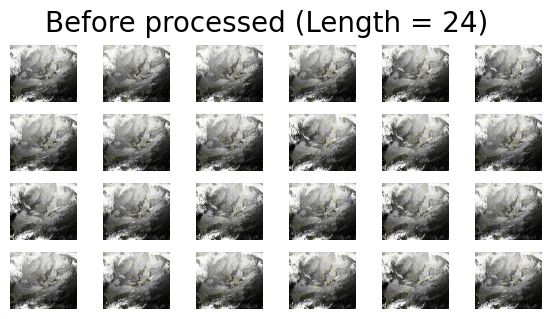

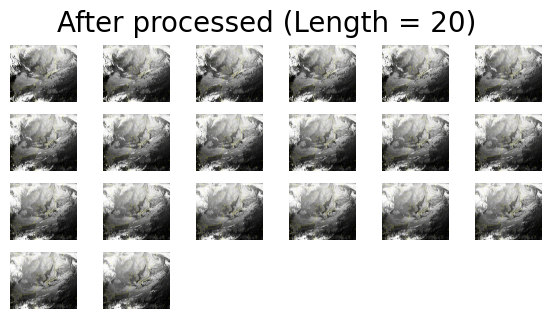

In [21]:
show_flag = True

for i, video in enumerate(videos):
    if len(video) > 20:
        if show_flag:
            f, axarr = plt.subplots(4,6, figsize=(7,3.5), dpi=100)
            for i, v in enumerate(video):
                r = i // 6
                c = i % 6
                for p in os.listdir(rawdatapath + v + "_image/"):
                    if "ir01" in p: 
                        img = plt.imread(rawdatapath + v + "_image/" + p)
                        axarr[r,c].imshow(img)
                        axarr[r,c].axis("off")
                        #tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)
            f.suptitle("Before processed (Length = %d)" % (len(video)), fontsize=20)
            f.show()

            print("Randomly select " + str(sample_size) + " among " + str(len(video)))
            num_images = len(video)
            sample_images = [video[0]] + np.random.choice(list(set(video) - {video[0]}), sample_size-1, replace=False).tolist()
            sampled_video = sorted(sample_images)

            f, axarr = plt.subplots(4,6, figsize=(7,3.5), dpi=100)
            for i, v in enumerate(sampled_video):
                r = i // 6
                c = i % 6
                for p in os.listdir(rawdatapath + v + "_image/"):
                    if "ir01" in p: 
                        img = plt.imread(rawdatapath + v + "_image/" + p)
                        axarr[r,c].imshow(img)
                        # axarr[r,c].axis("off")
                        #tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)
            for i in range(24):
                r = i // 6
                c = i % 6
                axarr[r,c].axis("off")
            f.suptitle("After processed (Length = %d)" % (len(sampled_video)), fontsize=20)
            f.show()
            
            show_flag = False
        else:
            num_images = len(video)
            sample_images = [video[0]] + np.random.choice(list(set(video) - {video[0]}), sample_size-1, replace=False).tolist()
            sampled_video = sorted(sample_images)
            videos[i] = sampled_video